n = 238896 for 0-share
n = 17567 for 1-share
n = 2940 for 2-share
Height: 6, Aspect: 1.33


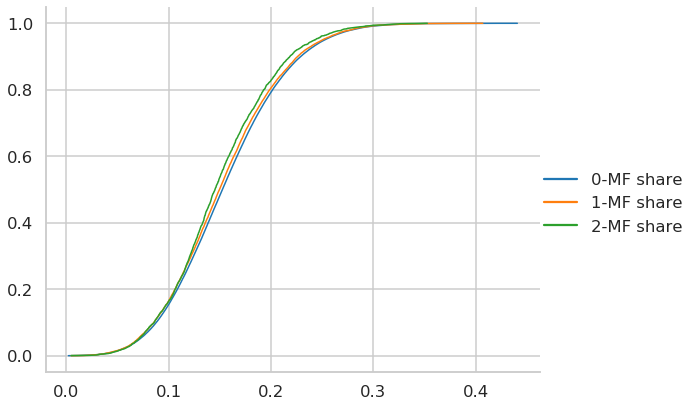

n = 238896 pairs for 0-share
n = 17567 pairs for 1-share
n = 2940 pairs for 2-share
n = 145 pairs for 3-share
KruskalResult(statistic=71.71245381283823, pvalue=2.678172292574243e-16)


In [69]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import compress_pickle
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
# from my_plot import MyPlotData
import my_plot_data
import lib_weight_correlation as libweight
importlib.reload(libweight)
from lib_weight_correlation import hist_to_mpd
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData

script_n = 'correlation_shares_syn_weight_210830'

mf_grc_db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/mf_grc/' \
              'gen_210429_setup01_v2_syndb_threshold_20_coalesced.gz'

grc_pc_db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/grc_axons/' \
              'gen_210429_setup01_syndb_threshold_10_coalesced.gz'

def weight_fn(syn):
    props = syn['props']['area_erode0']
    if 'mesh_area' in props:
        area = props['mesh_area']
    else:
        area = 0
    return area
    diameter = math.sqrt(area/math.pi)*2
    return diameter*1000

# round_factor = 16
round_factor = None
single_synapse = False

from weight_database import WeightDatabase
grc_pc_db = WeightDatabase()
mf_grc_db = compress_pickle.load(mf_grc_db_f)
grc_pc_db.load_syn_db(grc_pc_db_f,
    weight_fn=weight_fn)

weights_db = grc_pc_db.get_weights()
full_axon_list = list(set(list(weights_db.keys())))
share_db = libweight.compute_mf_share(mf_grc_db, full_axon_list)

_, avg3, _, hist3 = libweight.get_paired_weights2(share_db, weights_db, full_axon_list,
                                                 n_shares=(3, 4),
                                                 round_factor=round_factor,
                                                 avg_round_factor=round_factor,
                                                 single_synapse=single_synapse,
                                                )
mpd3 = hist_to_mpd(hist3)
mpd3.add_key_value('model', '3-MF share')
mpd3.add_key_value('model_num', 3)
mpd3.add_pdf('count')
mpd3.add_cdf('count')


_, avg2, _, hist2 = libweight.get_paired_weights2(share_db, weights_db, full_axon_list,
                                                 n_shares=(2, 3, 4),
                                                 round_factor=round_factor,
                                                 avg_round_factor=round_factor,
                                                 single_synapse=single_synapse,
                                                 combinations=True,
                                                  max_combinations=3,
                                                )
mpd2 = hist_to_mpd(hist2)
mpd2.add_key_value('model', '2-MF share')
mpd2.add_key_value('model_num', 2)
mpd2.add_pdf('count')
mpd2.add_cdf('count')

_, avg1, _, hist1 = libweight.get_paired_weights2(share_db, weights_db, full_axon_list,
                                                 n_shares=(1,),
                                                 round_factor=round_factor,
                                                 avg_round_factor=round_factor,
                                                 single_synapse=single_synapse,
                                                )
mpd1 = hist_to_mpd(hist1)
mpd1.add_key_value('model', '1-MF share')
mpd1.add_key_value('model_num', 1)
mpd1.add_pdf('count')
mpd1.add_cdf('count')

_, avg0, _, hist0 = libweight.get_paired_weights2(share_db, weights_db, full_axon_list,
                                                 n_shares=(0,),
                                                 round_factor=round_factor,
                                                 avg_round_factor=round_factor,
                                                 single_synapse=single_synapse,
#                                                  combinations=True,
                                                )
mpd0 = hist_to_mpd(hist0)
mpd0.add_key_value('model', '0-MF share')
mpd0.add_key_value('model_num', 0)
mpd0.add_pdf('count')
mpd0.add_cdf('count')

# mpd_hist_data = MyPlotData()
# for k in sorted(hist_data.keys()):
#     mpd_hist_data.add_data_point(
#         weight=k,
#         count=hist_data[k],
#         model='Data',
#     )

avgs = [avg0, avg1, avg2, avg3]

for i in range(3):
    print(f'n = {len(avgs[i])} for {i}-share')

    
mpd_plot_cdf = MyPlotData()
mpd_plot_cdf.append(mpd0)
mpd_plot_cdf.append(mpd1)
mpd_plot_cdf.append(mpd2)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_plot_cdf,
    x="avg_weight",
    y='count_cdf',
    hue='model',
    ci='sd',
#     save_filename=f'{script_n}_kde.svg',
    show=True,
    )

for i in range(4):
    print(f'n = {len(avgs[i])} pairs for {i}-share')
    
# from scipy import stats
# print(stats.ks_2samp(avg0, avg1))
# print(stats.ks_2samp(avg0, avg2))
# print(stats.ks_2samp(avg1, avg2))

import scipy.stats
print(scipy.stats.kruskal(avgs[0], avgs[1], avgs[2]))

In [57]:
print(scipy.stats.kruskal(avgs[0], avgs[1], avgs[2]))
import scikit_posthocs
scikit_posthocs.posthoc_dunn([avgs[0], avgs[1], avgs[2]], p_adjust='bonferroni')

KruskalResult(statistic=71.71245381283823, pvalue=2.678172292574243e-16)


,1,2,3
1,1.000000e+00,1.158564e-09,1.217127e-08
2,1.158564e-09,1.000000e+00,7.542309e-03
3,1.217127e-08,7.542309e-03,1.000000e+00


In [73]:
avg_pfs = compress_pickle.load(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/pfs_pc_analysis/weight/'
#     'correlation_syn_diameter_dual_210423_shuffle_data.gz'
    'syn_area_dual_210431_data.gz'
)
# hist_pfs = defaultdict(int)
# for v in avg_pds:
#     hist_pfs[v] += 1


mpd_pfs = MyPlotData()
for v in hist_pfs:
    mpd_pfs.add_data_point(
        avg_weight=v,
        model_num=3,
        model='Redundant',
    )
# mpd_pfs_pdf = mpd_pfs.to_pdf('avg_weight')
# mpd_pfs.add_pdf('count')
# mpd_pfs.add_cdf('count')

NameError: name 'avg_pds' is not defined

Height: 4, Aspect: 1.0


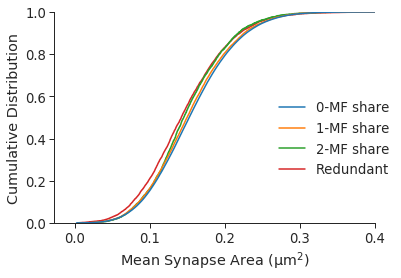

In [87]:

mpd_plot_cdf = MyPlotData()
mpd_plot_cdf.append(mpd0)
mpd_plot_cdf.append(mpd1)
mpd_plot_cdf.append(mpd2)
mpd_plot_cdf.append(mpd_pfs)

importlib.reload(my_plot); my_plot.my_displot(
    mpd_plot_cdf,
    x="avg_weight",
#     y='count_cdf',
    kind="ecdf",
    hue='model',
#     ci='sd',
    save_filename=f'{script_n}_cdf.svg',
    context='paper',
    height=4,
    width=4,
    xlim=[None, .4],
    x_axis_label='Mean Synapse Area (µm$^2$)',
    y_axis_label='Cumulative Distribution',
    show=True,
    )


In [74]:
print(scipy.stats.kruskal(avgs[0], avgs[1], avgs[2], avg_pfs))
import scikit_posthocs
scikit_posthocs.posthoc_dunn([avgs[0], avgs[1], avgs[2], avg_pfs], p_adjust='bonferroni')

KruskalResult(statistic=202.97614539231535, pvalue=9.595699790804797e-44)


,1,2,3,4
1,1.000000e+00,2.369771e-09,2.551066e-08,3.019626e-31
2,2.369771e-09,1.000000e+00,1.537881e-02,1.243971e-12
3,2.551066e-08,1.537881e-02,1.000000e+00,9.589395e-02
4,3.019626e-31,1.243971e-12,9.589395e-02,1.000000e+00


In [92]:
print(f'Variance for 0-share: {np.var(avgs[0])}')
print(f'Variance for 1-share: {np.var(avgs[1])}')
print(f'Variance for 2-share: {np.var(avgs[2])}')
print(f'Variance for redundant: {np.var(avg_pfs)}')

Variance for 0-share: 0.0030164459709734544
Variance for 1-share: 0.0030027376582450606
Variance for 2-share: 0.002717741365749996
Variance for redundant: 0.0032571561051773297


Height: 3.5, Aspect: 1.4285714285714286


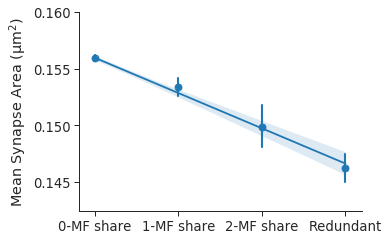

In [89]:

mpd_plot_cdf = MyPlotData()
mpd_plot_cdf.append(mpd0)
mpd_plot_cdf.append(mpd1)
mpd_plot_cdf.append(mpd2)
mpd_plot_cdf.append(mpd_pfs)

importlib.reload(my_plot); my_plot.my_lmplot(
    mpd_plot_cdf,
    x="model_num",
    y='avg_weight',
    ylim=[.1425, .16],
#     context='paper',
    x_estimator=np.mean,
    xticks=[0, 1, 2, 3],
    xticklabels=['0-MF share', '1-MF share', '2-MF share', 'Redundant'],
    y_axis_label='Mean Synapse Area (µm$^2$)',
#     kind='box',
#     hue='model',
#     ci='sd',
    height=3.5,
    width=5,
    save_filename=f'{script_n}_regression.svg',
    context='paper',
    show=True,
    )


In [84]:
print(f'share0: n = {len(mpd0.data)} pairs')
print(f'share1: n = {len(mpd1.data)} pairs')
print(f'share2: n = {len(mpd2.data)} pairs')
print(f'dual : n = {len(mpd_pfs.data)} pairs')

share0: n = 238492 pairs
share1: n = 17563 pairs
share2: n = 2900 pairs
dual : n = 8242 pairs


Height: 6, Aspect: 1.33


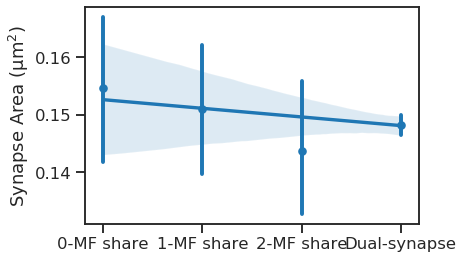

In [6]:

import my_plot_data
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData
mpd_plot_cdf = MyPlotData()
sample=50
mpd_plot_cdf.append(mpd0, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd1, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd2, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd_pfs)

importlib.reload(my_plot); my_plot.my_regplot(
    mpd_plot_cdf,
    x="model_num",
    y='avg_weight',
#     context='paper',
#     x_jitter=.3,
    x_estimator=np.mean,
    xticks=[0, 1, 2, 3],
    xticklabels=['0-MF share', '1-MF share', '2-MF share', 'Dual-synapse'],
    y_axis_label='Synapse Area (µm$^2$)',
#     kind='box',
#     hue='model',
#     ci='sd',
#     save_filename=f'{script_n}_kde.svg',
    show=True,
    )



In [94]:
help(g.axes.set_x)

AttributeError: 'AxesSubplot' object has no attribute 'ylim'

Height: 6, Aspect: 1.33


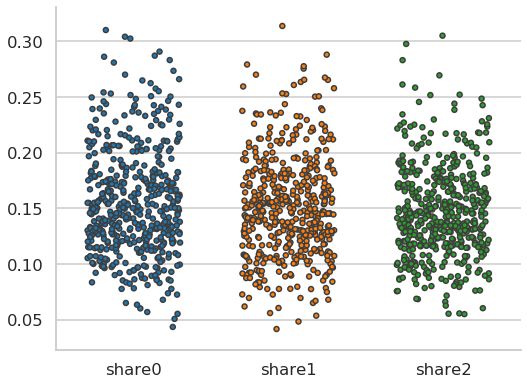

In [36]:

import my_plot_data
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData
mpd_plot_cdf = MyPlotData()
sample=500
mpd_plot_cdf.append(mpd0, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd1, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd2, sample=sample, sample_seed=4)

importlib.reload(my_plot); my_plot.my_catplot(
    mpd_plot_cdf,
    x="model",
    y='avg_weight',
    kind='strip',
    jitter=.3,
    linewidth=0,
#     hue='model',
#     ci='sd',
#     save_filename=f'{script_n}_kde.svg',
    show=True,
    )



Height: 4, Aspect: 1.25


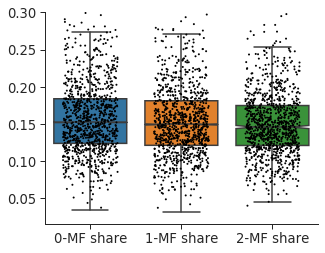

In [115]:

import my_plot_data
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData

mpd_plot_cdf = MyPlotData()
mpd_plot_cdf.append(mpd0)
mpd_plot_cdf.append(mpd1)
mpd_plot_cdf.append(mpd2)
mpd_plot_cdf.append(mpd_pfs)

add_mpd_plot_cdf = MyPlotData()
sample=1000
add_mpd_plot_cdf.append(mpd0, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd1, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd2, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd_pfs, sample=sample, sample_seed=4)

importlib.reload(my_plot); my_plot.my_catplot(
    mpd_plot_cdf,
    x="model",
    y='avg_weight',
    context='paper',
    kind='box',
    xticklabels=['0-MF share', '1-MF share', '2-MF share'],
    ylim=[None, .3],
    notch=True,
    add_strip=True,
    add_kwargs={
        'color': 'black',
        'jitter': .3,
        'size': 2,
    },
    add_data=add_mpd_plot_cdf,
    showfliers=False,
    height=4,
    width=5,
#     jitter=.3,
#     linewidth=0,
#     hue='model',
#     ci='sd',
    save_filename=f'{script_n}_box_strip_paper.svg',
    show=True,
    )



Height: 6, Aspect: 1.33


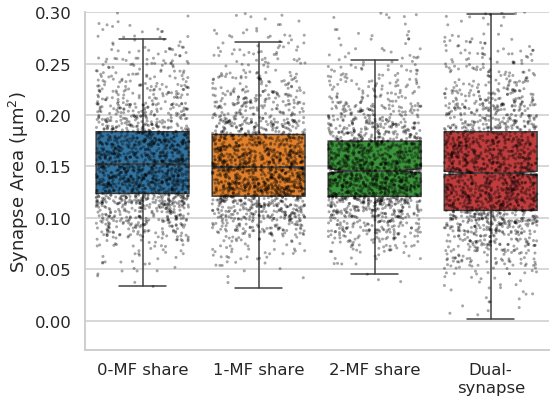

In [9]:

import my_plot_data
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData

mpd_plot_cdf = MyPlotData()
mpd_plot_cdf.append(mpd0)
mpd_plot_cdf.append(mpd1)
mpd_plot_cdf.append(mpd2)
mpd_plot_cdf.append(mpd_pfs)

add_mpd_plot_cdf = MyPlotData()
sample=1600
add_mpd_plot_cdf.append(mpd0, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd1, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd2, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd_pfs, sample=sample, sample_seed=4)

importlib.reload(my_plot); my_plot.my_catplot(
    mpd_plot_cdf,
    x="model",
    y='avg_weight',
#     context='paper',
    kind='box',
    xticklabels=['0-MF share', '1-MF share', '2-MF share', 'Dual-\nsynapse'],
    ylim=[None, .3],
    notch=True,
    add_strip=True,
    add_kwargs={
        'color': 'black',
        'jitter': .4,
        'size': 3,
        'alpha': .35,
    },
    add_data=add_mpd_plot_cdf,
    showfliers=False,
#     height=4,
#     width=5,
#     jitter=.3,
#     linewidth=0,
#     hue='model',
#     ci='sd',
    y_axis_label='Synapse Area (µm$^2$)',
    save_filename=f'{script_n}_box_strip_pres.svg',
    show=True,
    )



Height: 6, Aspect: 1.33


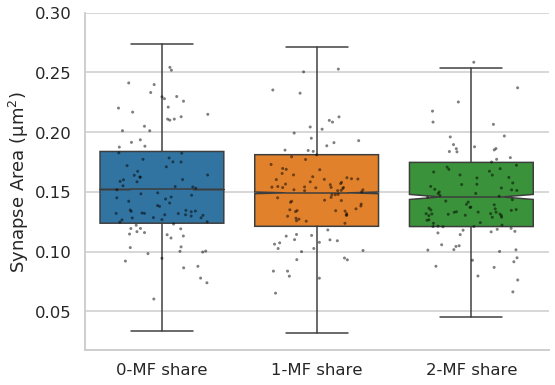

In [123]:

import my_plot_data
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData

add_mpd_plot_cdf = MyPlotData()
sample=100
add_mpd_plot_cdf.append(mpd0, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd1, sample=sample, sample_seed=4)
add_mpd_plot_cdf.append(mpd2, sample=sample, sample_seed=4)

importlib.reload(my_plot); my_plot.my_catplot(
    mpd_plot_cdf,
    x="model",
    y='avg_weight',
#     context='paper',
    kind='box',
    xticklabels=['0-MF share', '1-MF share', '2-MF share'],
    ylim=[None, .3],
    notch=True,
    add_strip=True,
    add_kwargs={
        'color': 'black',
        'jitter': .3,
        'size': 3,
        'alpha': .5,
    },
    add_data=add_mpd_plot_cdf,
    showfliers=False,
#     height=4,
#     width=5,
#     jitter=.3,
#     linewidth=0,
#     hue='model',
#     ci='sd',
    y_axis_label='Synapse Area (µm$^2$)',
#     save_filename=f'{script_n}_box_strip_pres.svg',
    show=True,
    )



In [ ]:

import my_plot_data
importlib.reload(my_plot_data)
from my_plot_data import MyPlotData
mpd_plot_cdf = MyPlotData()
sample=500
mpd_plot_cdf.append(mpd0, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd1, sample=sample, sample_seed=4)
mpd_plot_cdf.append(mpd2, sample=sample, sample_seed=4)

importlib.reload(my_plot); g = my_plot.my_catplot(
    mpd_plot_cdf,
    x="model",
    y='avg_weight',
    kind='strip',
    jitter=.3,
    linewidth=0,
#     hue='model',
#     ci='sd',
#     save_filename=f'{script_n}_kde.svg',
    show=True,
    )



In [ ]:

importlib.reload(my_plot);
g = my_plot.my_catplot(
    mpd_plot_cdf,
    y="score",
    x="type",
    # ylim=[.30, .70],
    context='paper',
    kind='box',
    # add_swarm=True,
    xticklabels=xticklabels,
    height=4,
    width=6,
    notch=True,
    ci=95,
#     palette=['white', 'white', 'white', 'white', ],
    y_axis_label='Similarity',
    # x_axis_label='# of synapses per connection',
    save_filename=f'{script_n}_max_dist_{max_dist}_min_length_{min_length}.svg',
    show=True,
    )

In [183]:
from scipy import stats
print(stats.ks_2samp(avg0, avg1))
print(stats.ks_2samp(avg0, avg2))
print(stats.ks_2samp(avg1, avg2))

KstestResult(statistic=0.013880355638715203, pvalue=0.6562425509542655)
KstestResult(statistic=0.10611506572218377, pvalue=0.00565508859510527)
KstestResult(statistic=0.11354535146356708, pvalue=0.0039273881208559125)


In [11]:
import scipy.stats
scipy.stats.kruskal(avgs[0], avgs[1], avgs[2], avg_pfs)

KruskalResult(statistic=203.06727605728068, pvalue=9.17031818358445e-44)

In [184]:
import itertools
from scipy import stats
for i, j in itertools.combinations([0, 1, 2], 2):
    print(f'Comparing {i} to {j}: {stats.ranksums(avgs[i], avgs[j])}')

Comparing 0 to 1: RanksumsResult(statistic=-0.4971407203654879, pvalue=0.6190898209810047)
Comparing 0 to 2: RanksumsResult(statistic=1.9831652252248622, pvalue=0.047348976854541)
Comparing 1 to 2: RanksumsResult(statistic=2.075341724643634, pvalue=0.03795487499840664)


In [13]:

mpd = MyPlotData()
for share in [0, 1, 2]:
    for val in avgs[share]:
        mpd.add_data_point(
            share=share,
            val=val, 
        )
for val in avg_pfs:
    mpd.add_data_point(
        share='dual',
        val=val, 
    )
import scikit_posthocs as sp
# sp.posthoc_dunn(mpd.to_dataframe(), val_col='val', group_col='share', p_adjust='bonferroni')
sp.posthoc_conover(mpd.to_dataframe(), val_col='val', group_col='share', p_adjust='bonferroni')


,0,1,2,dual
0,1.000000e+00,8.694088e-14,0.000003,9.184580e-29
1,8.694088e-14,1.000000e+00,0.074496,8.091172e-11
2,3.439647e-06,7.449621e-02,1.000000,4.776565e-01
dual,9.184580e-29,8.091172e-11,0.477657,1.000000e+00


In [ ]:
asdf

In [156]:
from scipy import stats
stats.levene(avg_data, avg_shuffle)

LeveneResult(statistic=0.44411711755945155, pvalue=0.5056251494754529)

In [157]:
[np.var(x, ddof=1) for x in [avg_data, avg_shuffle]]

[0.007737091194968554, 0.0069672798742138374]

In [8]:
import scipy.stats

scipy.stats.spearmanr(array_w1, array_w2)

#array_w1

SpearmanrResult(correlation=0.03458645975790905, pvalue=0.5375878550004599)

In [9]:
print(len(array_w1))

320


Height: 3, Aspect: 1.0


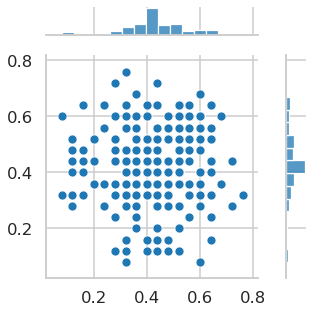

In [21]:
importlib.reload(my_plot); my_plot.my_jointplot(
    mpd_raw,
    x="w1",
    y="w2",
    # y_axis_label='Distance from PCL (um)',
    # x_axis_label='X offset from soma (um)',
    # xlim=[-200, 200],
    # kind=f'{kind}',
    height=3,
    width=3,
    kind='scatter',
    size=5,
    save_filename=f'{script_n}.svg',
    show=True,
    )

Height: 6, Aspect: 1.33


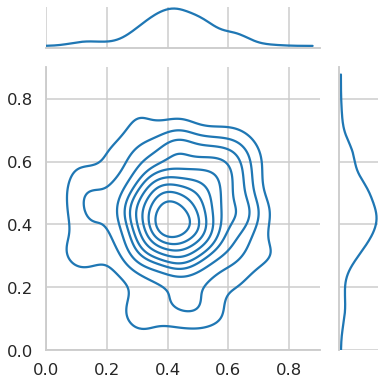

In [27]:

importlib.reload(my_plot); my_plot.my_jointplot(
    mpd_raw,
    x="w1",
    y="w2",
    ylim=[None, .9],
    xlim=[None, .9],
    # y_axis_label='Distance from PCL (um)',
    # x_axis_label='X offset from soma (um)',
    # xlim=[-200, 200],
    # kind=f'{kind}',
    kind='kde',
    save_filename=f'{script_n}_kde.svg',
    show=True,
    )

Height: 4, Aspect: 1.33


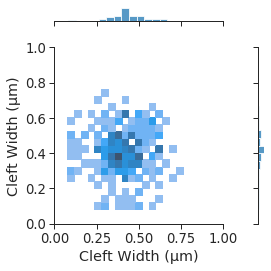

In [51]:
importlib.reload(my_plot); my_plot.my_jointplot(
    mpd_raw,
    x="w1",
    y="w2",
    y_axis_label='Cleft Width (µm)',
    x_axis_label='Cleft Width (µm)',
    xlim=[0, 1],
    ylim=[0, 1],
    # kind=f'{kind}',
    binwidth=.0401,
    height=4,
    kind='hist',
    context='paper',
    save_filename=f'{script_n}_hist.svg',
    show=True,
#     log_scale_x=True,
#     log_scale_y=True,
    )
